# Week1 量子回路における加算器
この週では、量子回路を用いて単純な古典計算(加算)を行います。

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

量子回路は、量子計算の過程を記述する手法の１つで、基本的な操作を行う量子ゲートを組み合わせて構成されます。まず、いくつかの主要な量子ゲートをご紹介します。

### Xゲート
Xゲートはブロッホ球の$x$軸周りの$\pi$回転です。
|0>にXゲートを適用すると|1>、|1>にXゲートを適用すると|0>になるので、古典のNOTゲートのような操作が実現でき、ビット反転とも呼ばれます。

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

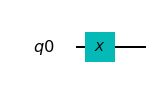

In [2]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

### Zゲート
Zゲートはブロッホ球の$z$軸周りの$\pi$回転です。位相反転とも呼ばれます。

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

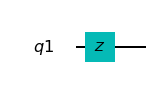

In [3]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.z(q[0])
qc.draw(output='mpl')

### Hゲート
Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば|0>にHゲートを適用すると、$\frac{|0> + |1>}{\sqrt{2}}$のような重ね合わせ状態を作ることができます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

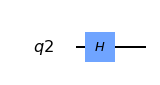

In [4]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

### CXゲート(CNOTゲート)
CXゲートは制御NOTゲート、CNOTとも呼ばれます。CXゲートは、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが|1>のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

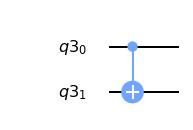

In [5]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZゲート
CZゲートも、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが|1>のときに、ターゲット量子ビットに対して位相反転(Zゲート)を行います。

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

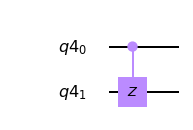

In [6]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

なお、CZゲートはCXゲートとHゲートから作ることができます。

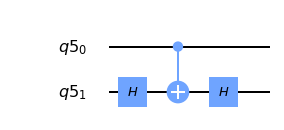

In [7]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

### CCXゲート
CCXゲートはToffoliゲートとも呼ばれます。

CCXゲートは、3つの量子ビット(2つの制御量子ビットと1つのターゲット量子ビット)を入出力に持ち、制御量子ビットが2つとも|1>のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{pmatrix}$

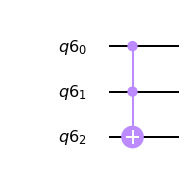

In [8]:
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

その他の量子ゲートの詳細に関しては[Summary of Quantum Operations](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/fundamentals/7_summary_of_quantum_operations.ipynb) をご覧ください。

## 古典の論理ゲートを量子ゲートで作成する
古典の論理ゲートを量子ゲートで作成してみましょう。
真理値表と量子回路による表現を以下に示します。なお、量子レジスタをq、古典レジスタをcとし、測定結果を作成する論理ゲートの出力とします。

### NOTゲート
先述の通り、XゲートをNOTゲートとみなすことができます。 真理値表は以下のようになります。


|入力|出力|
|--|--|
|0|1|
|1|0|

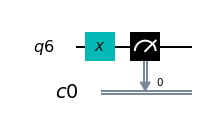

In [8]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])
qc.draw(output='mpl')

### ANDゲート
ANDゲートの真理値表は以下のようなものです。

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

CCXゲートを用いると、制御量子ビット2つに対するANDゲートの結果をターゲット量子ビットに得られます。

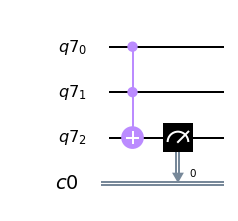

In [9]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NANDゲート
NANDゲートはANDゲートにNOTゲートを適用したものと捉えることができます。

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

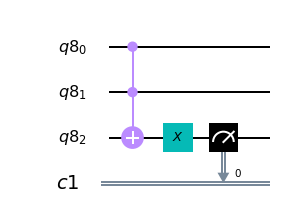

In [10]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### ORゲート

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

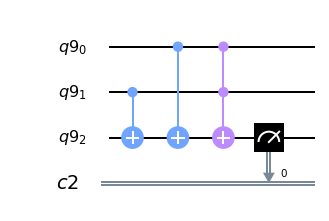

In [11]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XORゲート
|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

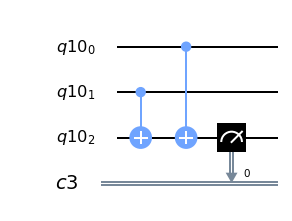

In [12]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NORゲート 

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

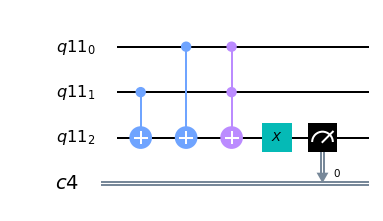

In [13]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# 加算器

加算器は足し算を行う論理回路です。

今回は最もシンプルな加算器である半加算器と全加算器を用いた加算器に関して考えます。

## 半加算器
半加算器は、２進数を2つ与えられたとき、一番下の位の値どうしの加算を行います。
1ビットの情報2つ(入力A,B)が入力として与えられ、桁上げ出力(Carry out)、出力（Sum、和）の２つを出力に持ちます。
この桁上げ出力の情報は、後述の全加算器の入力の１つとして１つ上の位の値を求めるために用いられます。


半加算器は以下の様な真理値表の論理回路で表すことができます。

|入力A|入力B|桁上げ出力C|出力S|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|0|1|
|1|0|0|1|
|1|1|1|0|

この真理値表を見ると、桁上げ出力Cは入力Aと入力Bに対してANDを適用したものであること、出力Sは入力Aと入力Bに対してXORを適用したものであることがわかります。
ANDとXORに関してはすでに作成済みなので、以下のように組み合わせて半加算器の量子回路が作成できます。

なお、量子レジスタをq, 古典レジスタcとし、入力A, Bをq[0],q[1]に、桁上げ出力C,出力Sをq[2], q[3]に割り振ります。
また、出力結果はc[1], c[0]の順になっていることに注意して下さい。

{'00': 1000}


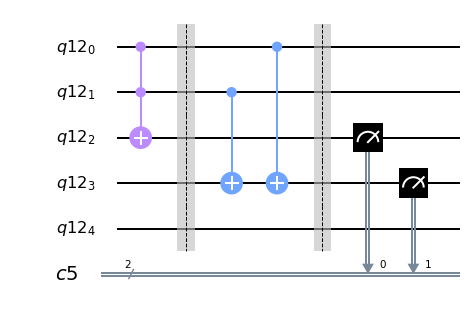

In [14]:
#各レジスタ、量子回路を宣言
q = QuantumRegister(5)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#AND
qc.ccx(q[0], q[1], q[2])

qc.barrier(q)

#XOR
qc.cx(q[1], q[3])
qc.cx(q[0], q[3])

qc.barrier(q)

#Carry out
qc.measure(q[2], c[0])
#Sum
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

# 問題
全加算器は、下の位からの桁上げを含む加算器である。
全加算器を量子回路で表現せよ。なお、真理値表は以下のようになる。

|入力A|入力B|桁上げ入力X|桁上げ出力C|出力S|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|0|1|
|0|1|0|0|1|
|0|1|1|1|0|
|1|0|0|0|1|
|1|0|1|1|0|
|1|1|0|1|0|
|1|1|1|1|1|


なお、量子レジスタをq, 古典レジスタcとする。また、入力A, B, 桁上げ入力Xをそれぞれq[0], q[1], q[2]に与えられるものとし、測定結果のc[0]に桁上げ出力C、c[1]に出力Sが出力されるようにすること。

入力000から111までの出力結果をカンマで区切ったものと、入力000の全加算器に対してunrollerを用いてu3とCXに分解した結果を提出してください。
例
00,01,01,10,01,... 改行
{'u3': 27, 'cx': 24}

# 解答例

半加算器２つとORを使うことで全加算器を実装することができます。

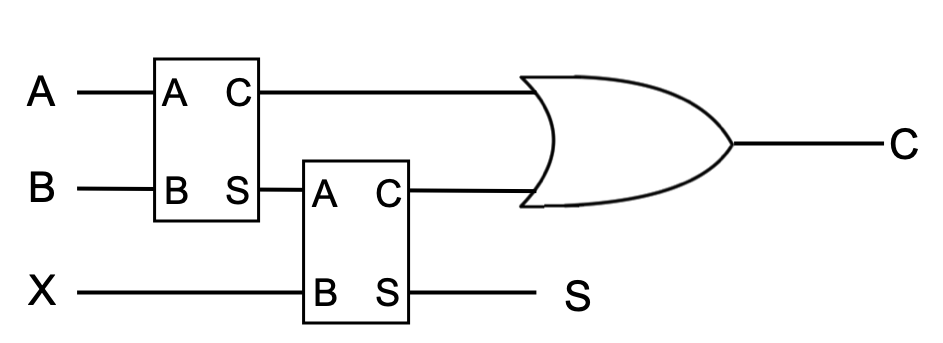

In [1]:
from IPython.display import Image, display
Image('./fig/adder.png')

{'00': 1000}


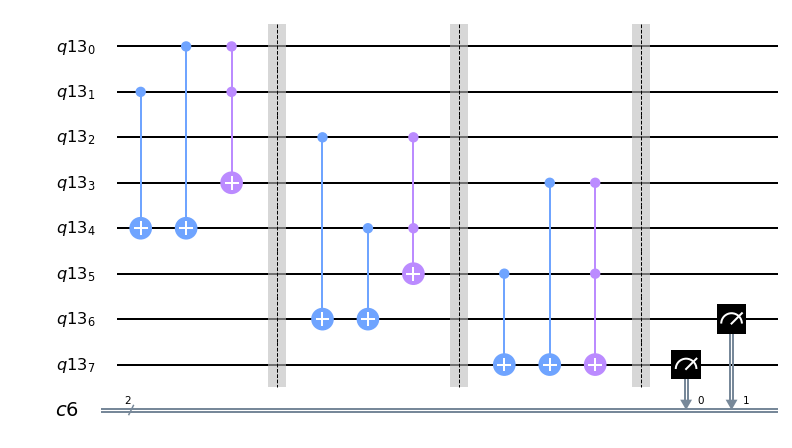

In [17]:
#各レジスタ、量子回路を宣言
q = QuantumRegister(8)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#入力状態の準備(テスト用)
# inputdata = [1,1,1] 
# if inputdata[0] == 0:
#     print('0')
# else: 
#     qc.x(q[0])
#     print('1')
# if inputdata[1] == 0:
#     print('0')    
# else: 
#     qc.x(q[1])
#     print('1')
# if inputdata[2] == 0:
#     print('0')    
# else: 
#     qc.x(q[2])
#     print('1')

def OR(a,b,c):
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c])
    qc.ccx(q[a], q[b], q[c])
def hadder(a,b,c,s):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])
    
hadder(0,1,3,4)
qc.barrier(q)
hadder(4,2,5,6)
qc.barrier(q)
OR(3,5,7)
qc.barrier(q)
#観測
qc.measure(q[7], c[0])
qc.measure(q[6], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

## TIPS: Unrollerを用いた量子コストの導出
プログラム(量子回路)を評価する手法がいくつか存在します。

1. 量子ビット数
2. 深さ
3. 実行速度
4. 命令数

これらはどれも量子計算の結果やスループットなどに影響する重要な尺度ですが、今回のQuantum Challengeでは特に4の命令数を指標として、以下のようにプログラムを評価しています。今回の手法で用いる値をコストと呼称します。

コスト $=$ 単一量子ビットゲートの数 $+$ CXゲートの数 $\times 10$

任意の量子回路は単一量子ビットゲート(1量子ビットに対する命令)と2量子ビットゲートにt対する命令に分解して同等な回路を構築することができます。また、現代のデバイスではCXゲートの方がノイズが乗りやすいので10倍の重み付けをしています。

unrollerと呼ばれるプログラムを用いることで、皆さんのお手元でもこのコストを導出することができます。
例えば、以下のような量子回路があったとします。

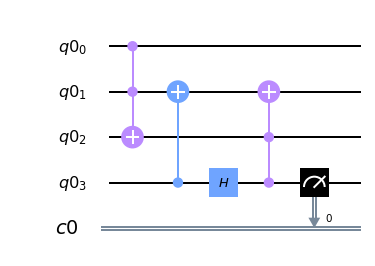

In [26]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')
#qc.count_ops()

In [27]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

この量子回路には単一量子ビットゲートやCXゲート以外のゲート(CCXゲート)が入っていますが、以下のようにunroller内で指定したゲートのみに分解することができます。

In [30]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

よって、この回路のコストは$19+13\times10=149$ということになります。